In [2]:
import sys
import numpy as np
import matplotlib
import librosa
from matplotlib import pyplot as plt
import librosa.display
from scipy import signal
from scipy.fft import fftshift
import IPython

In [3]:
Ts = 0.01   
Tf = 0.02
cmap_plot = plt.cm.bone_r 
FIG_SIZE = (8,3)

In [8]:
def getFIRFFT(H, order):
    NFFT = (len(H)-1)*2
    H = np.concatenate((H, H[-2:0:-1])) + np.zeros(NFFT)*(1j)
    h = np.fft.ifft(H, NFFT//2)
    order = min(order, NFFT-1)
    h = np.concatenate((h[len(h)-order//2:], h[0:order//2-1]))
    win = librosa.filters.get_window('hamming', len(h), fftbins=False)
    h = h*win
    return h.real

def drawFIRFFT(h, NFFT):
    plt.subplot(1,2,1)
    plt.plot(h)
    h_fft = np.abs(np.fft.fft(h, NFFT))
    plt.subplot(1,2,2)
    plt.plot(h_fft)
    plt.show()
    return h

In [9]:
# 오디오 파일 부르기
wavefile = 'D:/YYN/audio_/digitrec_ye/segmented/YouYeNa/3/kdigits0-3.wav'
x , sr = librosa.load(wavefile , sr=16000)
Ns = int(sr*Ts)  # 10ms 샘플 수
Nf = int(sr*Tf)  # 20ms 샘플 수

In [13]:
speechfile = 'D:/YYN/audio_/digitrec_ye/segmented/YouYeNa/3/kdigits0-3.wav'
noisefile  = 'D:/YYN/audio_/lab04_car.wav'
speech, sr_s = librosa.load(speechfile, sr=16000)
noise, sr_n = librosa.load(noisefile, sr= 16000)

Text(0.5, 1.0, 'car noise')

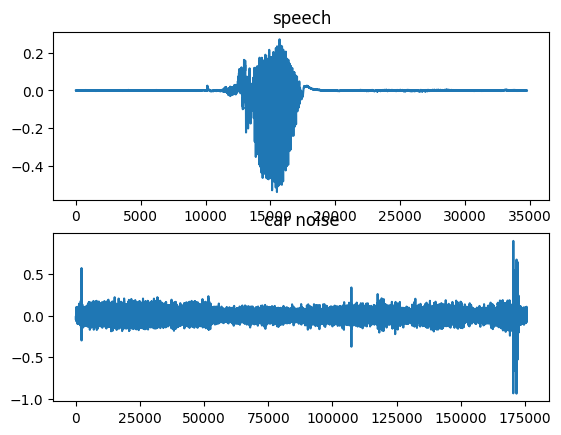

In [17]:
plt.subplot(2,1,1)
plt.plot(speech)
plt.title('speech')
plt.subplot(2,1,2)
plt.plot(noise)
plt.title('car noise')

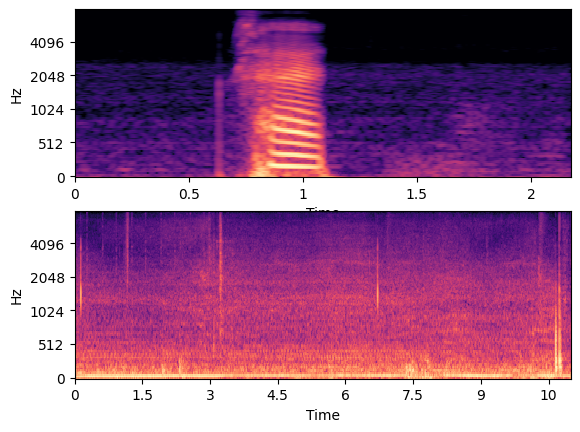

In [39]:
speech_f = librosa.feature.melspectrogram(y=speech, sr=16000, hop_length=10, n_fft=1024)
noise_f = librosa.feature.melspectrogram(y=noise, sr=16000, hop_length=10, n_fft=1024)
plt.figure()
plt.subplot(2,1,1)
librosa.display.specshow(librosa.power_to_db(speech_f, ref=np.max), y_axis='mel', sr=sr, hop_length=10, x_axis='time')
plt.subplot(2,1,2)
librosa.display.specshow(librosa.power_to_db(noise_f, ref=np.max), y_axis='mel', sr=sr, hop_length=10, x_axis='time')

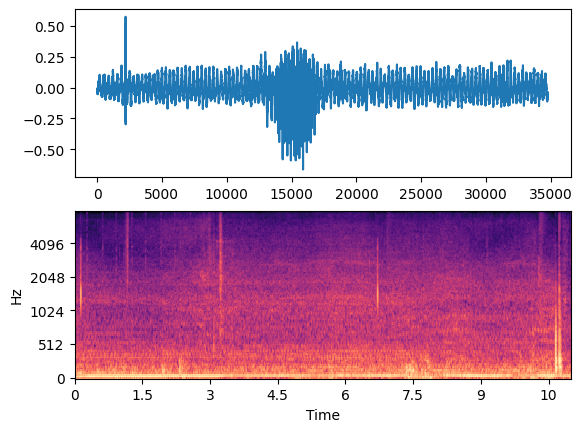

In [40]:
noise2 = noise[0:34774]
mix = speech + noise2
mix_f = librosa.feature.melspectrogram(y=noise, sr=16000, hop_length=10, n_fft=1024)
plt.figure()
plt.subplot(2,1,1)
plt.plot(mix)
plt.subplot(2,1,2)
librosa.display.specshow(librosa.power_to_db(mix_f, ref=np.max), y_axis='mel', sr=16000, hop_length=10, x_axis='time')

In [50]:
n = int(sr/200)
H = np.array(([1.0]*n) + ([0.0]*int(Nf-2*n)) +([1.0]*n))
filter = getFIRFFT(H, order = 30)
fl = int(len(filter))
mix_f2 = np.zeros(int(len(mix)))
mix_f = np.zeros(int(len(mix)))
for i in range(int(len(mix)//fl)):
    mix_f[0+10*(i+1):fl+10*(i+1)] = mix[0+10*(i+1):fl+10*(i+1)]*filter  #, mix[fl+1+(10*(i+1)):]))
    mix_f2 = mix_f2 + mix_f

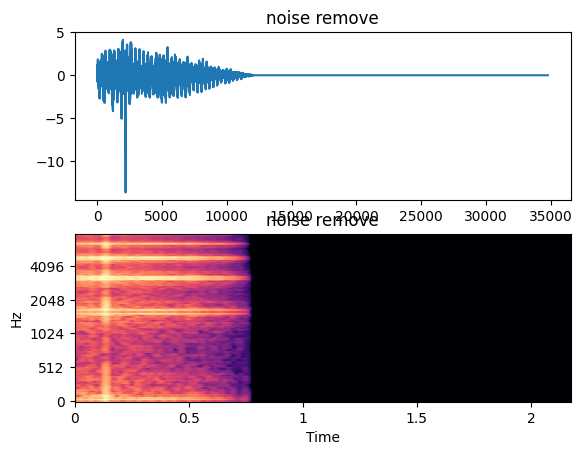

In [51]:
mix_f3 = librosa.feature.melspectrogram(y=mix_f2, sr=16000, hop_length=10, n_fft=1024)

plt.figure()
plt.subplot(2,1,1)
plt.plot(mix_f2)
plt.title('noise remove')
plt.subplot(2,1,2)
librosa.display.specshow(librosa.power_to_db(mix_f3, ref=np.max), y_axis='mel', sr=16000, hop_length=10, x_axis='time')
plt.title('noise remove')
plt.show()